In [92]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import time
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from scipy import stats
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.multiclass import OneVsOneClassifier

import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [91]:
TEST_SIZE = 0.2

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def vectorization_TF_IDF(DATASET, text_field_name, label_name):

    X_train, X_test, y_train, y_test = train_test_split( DATASET[text_field_name] ,
                                                    DATASET[label_name],
                                                    train_size=0.80, random_state=28)

    encoder = preprocessing.LabelEncoder()
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.fit_transform(y_test)

    return X_train, X_test, y_train, y_test

def saving_results(results, path, file_name):

    results.to_csv(path + file_name,  index = False, sep=";")

def train_model(classifier, X_train_v, X_test_v, y_train, y_test):
    ini = time.time()
    classifier.fit(X_train_v, y_train)
    predictions = classifier.predict(X_test_v)
    fim = time.time()

    timee = fim-ini
    acuracia = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    f1_score = metrics.f1_score(y_test, predictions, average='weighted')
    print("Time: " + str(timee))
    print("Acurácia: " + str(acuracia))
    print("Precision: " + str(precision))
    print("Recal: " + str(recall))
    print("f1_score: " + str(f1_score))

    return timee , acuracia, precision, recall, f1_score, matriz_confusao

def get_tests_result(X_train_v, X_test_v, y_train, y_test):

    all_res = []
    ### MLPClassifier
    print( "MLPClassifier")
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70, ), random_state=1, verbose=True)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    print(matriz_confusao)
    all_res.append(["MLPClassifier: ", timee , acuracia, precision, recall, f1_score])
    #ConfusionMatrixDisplay.from_estimator(clf,X_test_v, y_test)



    ### AdaBoostClassifier
    print( "AdaBoostClassifier: ")
    clf = AdaBoostClassifier(n_estimators= 50, learning_rate=1)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    print(matriz_confusao)
    all_res.append(["AdaBoostClassifier: ", timee , acuracia, precision, recall, f1_score])

    ### Voting_LR3_SVC1_ETC2
    print( "Voting_LR3_SVC1_ETC2: ")
    ini = time.time()
    clf2 = LogisticRegression(random_state=0)
    clf5 = SVC(kernel='rbf', probability=True)
    clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)
    eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[3, 1, 2])
    clf2 = clf2.fit(X_train_v, y_train)
    clf5 = clf5.fit(X_train_v, y_train)
    clf6 = clf6.fit(X_train_v, y_train)
    eclf = eclf.fit(X_train_v, y_train)
    #Y_previsto_vc1 = eclf.predict(X_test_v.toarray())
    Y_previsto_vc1 = eclf.predict(X_test_v)
    fim = time.time()

    timee = fim-ini
    acuracia = accuracy_score(y_test, Y_previsto_vc1)
    precision = precision_score(y_test, Y_previsto_vc1, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, Y_previsto_vc1)
    recall = recall_score(y_test, Y_previsto_vc1, average='weighted')
    f1_score = metrics.f1_score(y_test, Y_previsto_vc1, average='weighted')
    print("Time: " + str(timee))
    print("Acurácia: " + str(acuracia))
    print("Precision: " + str(precision))
    print("Recal: " + str(recall))
    print("f1_score: " + str(f1_score))
    print(matriz_confusao)
    all_res.append(["Voting_LR3_SVC1_ETC2: ", timee , acuracia, precision, recall, f1_score])

    ### DecisionTreeClassifier
    print( "DecisionTreeClassifier: ")
    clf = DecisionTreeClassifier(random_state=0)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    print(matriz_confusao)
    all_res.append(["DecisionTreeClassifier: ", timee , acuracia, precision, recall, f1_score])

    ### RandomForestClassifier
    print( "RandomForestClassifier: " )
    clf = RandomForestClassifier(n_estimators=50, random_state=1)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    print(matriz_confusao)
    all_res.append(["RandomForestClassifier: ", timee , acuracia, precision, recall, f1_score])

    ### ExtraTreesClassifier
    print( "ExtraTreesClassifier: ")
    clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    print(matriz_confusao)
    all_res.append(["ExtraTreesClassifier: ", timee , acuracia, precision, recall, f1_score])

    ### LogisticRegression
    print( "LogisticRegression: ")
    clf = LogisticRegression(random_state=0)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    print(matriz_confusao)
    all_res.append(["LogisticRegression: ",  timee , acuracia, precision, recall, f1_score])

    ### svm
    print( "svm: ")
    clf = svm.SVC()
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    print(matriz_confusao)
    all_res.append(["svm: ",  timee , acuracia, precision, recall, f1_score])

    ### Stacking_scikit
    print( "Stacking_scikit: ")
    clf1 = RandomForestClassifier(n_estimators=50, random_state=1)
    clf2 = LogisticRegression(random_state=0)
    clf3 = SVC()
    clf4 = ExtraTreesClassifier(n_estimators=100, random_state=0)
    estimators = [('rf', clf1), ('lr', clf2), ('svc', clf3), ('etc', clf4)]
    ini = time.time()
    clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression(), n_jobs=None)
    clf.fit(X_train_v, y_train)
    Y_Previsto_stacking = clf.predict(X_test_v)
    fim = time.time()

    timee = fim-ini
    acuracia = accuracy_score(y_test, Y_Previsto_stacking)
    precision = precision_score(y_test, Y_Previsto_stacking, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, Y_Previsto_stacking)
    recall = recall_score(y_test, Y_Previsto_stacking, average='weighted')
    f1_score = metrics.f1_score(y_test, Y_Previsto_stacking, average='weighted')
    print("Time: " + str(timee))
    print("Acurácia: " + str(acuracia))
    print("Precision: " + str(precision))
    print("Recal: " + str(recall))
    print("f1_score: " + str(f1_score))
    print(matriz_confusao)
    all_res.append(["Stacking_scikit: ",  timee , acuracia, precision, recall, f1_score])

    ### XGBClassifier
    #print( "XGBClassifier: ")
    #clf = XGBClassifier(eval_metric='mlogloss' )
    #timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    #all_res.append(["XGBClassifier: ",  timee , acuracia, precision, recall, f1_score])

    ### OneVsRestClassifier_RF
    print( "OneVsRest_RF: ")
    clf = RandomForestClassifier(n_estimators=50, random_state=1)
    ovr = OneVsRestClassifier(clf)
    ini = time.time()
    ovr.fit(X_train_v, y_train)
    Y_Previsto_OVR_RF = ovr.predict(X_test_v)
    fim = time.time()


    timee = fim-ini
    acuracia = accuracy_score(y_test, Y_Previsto_OVR_RF)
    precision = precision_score(y_test, Y_Previsto_OVR_RF, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, Y_Previsto_OVR_RF)
    recall = recall_score(y_test, Y_Previsto_OVR_RF, average='weighted')
    f1_score = metrics.f1_score(y_test, Y_Previsto_OVR_RF, average='weighted')
    print("Time: " + str(timee))
    print("Acurácia: " + str(acuracia))
    print("Precision: " + str(precision))
    print("Recal: " + str(recall))
    print("f1_score: " + str(f1_score))
    print(matriz_confusao)
    all_res.append(["OvR_RF: ",  timee , acuracia, precision, recall, f1_score])

    return pd.DataFrame( all_res, columns=["ALGORITHM","TIME","ACCURACY","PRECISION","RECALL", "F1_SCORE"])

feat = ['Idade', 'Peso Kg', 'Cor da pele', 'ACTN3',
       'AGT', 'ECA', 'Score Força%', 'Score Resistência %',
       'Pré CK (U/L)', 'Pós CK (U/L)', 'Pré CK MB U/L', 'Pós CK MB U/L',
       'Pré Lactato (mmol/L)', 'Pós Lactato (mmol/L)', 'Pré LDH (U/L)',
       'Pós LDH (U/L)', 'Pré AST (U/L)', 'Pós AST (U/L)',
       'Pré Albumina (g/dL)', 'Pós Albumina (g/dL)', 'Pré TGP (g/dL)',
       'Pós TGP (g/dL)', 'Pré GGT U/L', 'Pós GGT U/L', 'Pré Ac. Úrico (mg/dL)',
       'Pós Ac. Úrico (mg/dL)', 'Pré TFG   (ml/min/1.73 m2)',
       'Pós TFG   (ml/min/1.73 m2)', 'Pré Ureia mg/dL', 'Pós Ureia mg/dL',
       'Pré creatinina mg/dL', 'Pós creatinina mg/dL',
       'Delta CREATININA mg/dL', 'Pré Fósforo mg/dL', 'Pós Fósforo mg/dL',
       'Pré Proteína Total (g/dL)', 'Pós Proteína Total (g/dL)',
       'Pré FE (ug/dL)', 'Pós FE (ug/dL)', 'Pré calcio mg/dL',
       'Pós calcio mg/dL', 'Pré Potássio mmol/L', 'Pós Potássio mmol/L',
       'Glicose pré', 'Glicose pós', 'Pré Sódio mmol/L', 'Pós Sódio mmol/L',
       'Pré Magnésio mg/dL', 'Pós Magnésio mg/dL', 'Pré Cloro mmol/L',
       'Pós Cloro mmol/L',
       'Osmolalidade sérica PRÉ BD4(mOsm/kg): 1,86(Na + K) + 1,15(Gli /18) + (Ureia/6) + 14\t\t\t',
       'Osmolalidade sérica PÓS BD4(mOsm/kg): 1,86(Na + K) + 1,15(Gli /18) + (Ureia/6) + 14\t\t\t',
       'Pré RCB 10^6/mm³', 'Pós RCB 10^6/mm³', 'Pré HGB g/dL', 'Pós HGB g/dL',
       'Pré HCT %', 'Pós HCT %', 'Pré MCV fL', 'Pós MCV fL', 'Pré MCH pg',
       'Pós MCH pg', 'Pré MCHC g/dL', 'Pós MCHC g/dL', 'Pré PLT 10³/mm³',
       'Pós PLT 10³/mm³', 'Pré RDW %', 'Pós RDW %', 'Pré RET %', 'Pós RET %',
       'Pré WBC 10³/mm³', 'Pós WBC 10³/mm³', 'Pré NEUT %', 'Pós NEUT %',
       'Pré LINF %', 'Pós LINF %', 'Pré MONO %', 'Pós MONO %', 'Pré EOS %',
       'Pós EOS %', 'Pré BASO %', 'Pós BASO %', 'massa magra', 'MCT KG', 'ESTATURA', 'vo2max estimado',
       'Handgrip     Dom.', 'Handgrip Cont.', '% gordura']

label_rabdomiolise = "Rabdomiólise"
label_lesao = "Lesão Renal Aguda"




In [105]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/'
file = 'dados.xlsx'
file2 = 'dados_completos.xlsx'
DATASET = pd.read_excel(path + file)
DATASET.drop(columns=['Ano'])

DATASET2 = pd.read_excel(path + file2)
DATASET


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ano  Missão  Aluno Idade Peso Kg Cor da pele ACTN3  AGT  ECA   BDKRB2  \
0    2018   CIASC   3150    33      88           1    XX   MT   ID  (-9,-9)   
1    2018   CIASC   3155    26      74           1    RR   MT   II  (+9,-9)   
2    2018   CIASC   3156    26      76           1    RX   MM   ID  (+9,+9)   
3    2018   CIASC   3159    25      84           1    RR   TT   DD  (+9,-9)   
4    2018   CIASC   3165    33      82           1    RR   MT   II  (+9,-9)   
..    ...     ...    ...   ...     ...         ...   ...  ...  ...      ...   
462  2023  Manaus   3340    29     NaN           2   NaN  NaN  NaN      NaN   
463  2023  Manaus   3343    27     NaN           2   NaN  NaN  NaN      NaN   
464  2023  Manaus   3347    28     NaN           2   NaN  NaN  NaN      NaN   
465  2023  Manaus   3348    29     NaN           2   NaN  NaN  NaN      NaN   
466  2023  Manaus   3350    29     NaN           2   NaN  NaN  NaN      NaN   

     ... Pós BASO % Lesão Renal Aguda Rabdomiólise  massa magra MCT KG  \
0    ...        0.1             False        False        75.52   84.3   
1    ...        0.2             False         True        69.49   75.9   
2    ...        0.3             False         True        72.07   79.2   
3    ...        0.9             False         True        75.26   84.3   
4    ...        0.1             False         True        66.26   79.6   
..   ...        ...               ...          ...          ...    ...   
462  ...        NaN             False        False        76,40   82.8   
463  ...        NaN             False        False        65,80   75.1   
464  ...        NaN             False        False        74,27   82.7   
465  ...        NaN             False        False        70,18   80.5   
466  ...        NaN             False        False        75,16   85.8   

     ESTATURA  vo2max estimado  Handgrip     Dom. Handgrip Cont.  % gordura  
0       181.5            50.85               35.0           37.0      10.05  
1       171.0            51.98               42.0           43.0       6.08  
2       174.0            52.42               49.5           49.5       8.72  
3       178.0            50.68               60.0           57.0      10.61  
4       182.0            47.64               51.0           49.0      14.84  
..        ...              ...                ...            ...        ...  
462     182.0            53,54               56.0           59.0       7,73  
463     170.0                -               48.0           60.0      12,39  
464     179.5            50,56               58.0           52.0      10,20  
465     181.0            51,80               60.0           50.0      12,82  
466     178.0            53,41               55.0           56.0      12,40  

[467 rows x 96 columns]

**PREPRAÇÃO DOS DADOS**

CASO 1 - Preencher NaN

In [104]:
from sklearn.impute import SimpleImputer


DATASET_fill_mean = DATASET.copy()
DATASET_fill_mean = DATASET_fill_mean.replace('-', np.nan)

# Preencher numéricos com média
imputer_mean = SimpleImputer(strategy='mean')
X_numeric = DATASET_fill_mean.select_dtypes(include=['float64', 'int64'])
DATASET_fill_mean[X_numeric.columns] = imputer_mean.fit_transform(X_numeric)

# Preencher categóricos com moda
imputer_freq = SimpleImputer(strategy='most_frequent')
X_categorical = DATASET_fill_mean.select_dtypes(include=['object', 'category'])
DATASET_fill_mean[X_categorical.columns] = imputer_freq.fit_transform(X_categorical)

X_fill_mean = DATASET_fill_mean.drop(columns=['Rabdomiólise'])
y_fill_mean = DATASET_fill_mean['Rabdomiólise']

X_fm_Train, X_fm_Test, y_fm_Train, y_fm_Test = train_test_split(X_fill_mean,y_fill_mean,test_size=TEST_SIZE)

results_rabdo = get_tests_result(X_fm_Train, X_fm_Test, y_fm_Train, y_fm_Test)
print("Resultados para previsão de Rabdomiólise:\n\n")
results_rabdo

MLPClassifier


ValueError: could not convert string to float: 'fim 2022'

CASO 2 - Dropar colunas com 50% mais de NaN e depois dropar linhas com NaN

In [84]:
taxa_drop = 0.5

DATASET_drop_cols50 = DATASET.copy()

DATASET_drop_cols50 = DATASET_drop_cols50.loc[:, DATASET_drop_cols50.isnull().mean() < taxa_drop]

DATASET_drop_cols50 = DATASET_drop_cols50.dropna()

X_drop_cols50 = DATASET_drop_cols50.drop(columns=['Rabdomiólise'])
y_drop_cols50 = DATASET_drop_cols50['Rabdomiólise']

X_drop_cols50_Train, X_drop_cols50_Test, y_drop_cols50_Train, y_drop_cols50_Test = train_test_split(X_drop_cols50,y_drop_cols50,test_size=TEST_SIZE)

CASO 3 - fill_mean + transforma texto/categotias em números

In [94]:
DATASET_encoded = DATASET_fill_mean.copy()

# Codificar colunas categóricas
label_encoder = preprocessing.LabelEncoder()
for coluna in DATASET_encoded.select_dtypes(include=['object', 'category']).columns:
    DATASET_encoded[coluna] = label_encoder.fit_transform(DATASET_encoded[coluna].astype(str))

X_encoded = DATASET_encoded.drop(columns=['Rabdomiólise'])
#scale_obj = preprocessing.StandardScaler()
#X_encoded = scale_obj.fit_transform(X_encoded)

y_encoded = DATASET_encoded['Rabdomiólise']

X_encoded_Train, X_encoded_Test, y_encoded_Train, y_encoded_Test = train_test_split(X_encoded,y_encoded,test_size=TEST_SIZE)

**APLICANDO PCA NOS DADOS**

In [ ]:
pca = decomposition.PCA(n_components=80)

X_fm_Train = pca.fit_transform(X_fm_Train)
X_fm_Test = pca.transform(X_fm_Test)

X_drop_cols50_Train = pca.fit_transform(X_drop_cols50_Train)
X_drop_cols50_Test = pca.transform(X_drop_cols50_Test)

X_encoded_Train = pca.fit_transform(X_encoded_Train)
X_encoded_Test = pca.transform(X_encoded_Test)

In [ ]:
DATASET2

In [ ]:
DATASET.columns

### Teste 1 -  'Pré CK (U/L)', 'Pós CK (U/L)', "Rabdomiólise"

In [89]:
col_label_rabdo = ["Rabdomiólise"]
col_label_lesao = ["Lesão Renal Aguda"]
col_feature = ['Pré CK (U/L)', 'Pós CK (U/L)']
col_to_be_encoded = ["Rabdomiólise", "Lesão Renal Aguda"]


col_df = ['Pré CK (U/L)', 'Pós CK (U/L)', "Rabdomiólise", "Lesão Renal Aguda"]


df = DATASET[col_df].dropna()
encoder = preprocessing.LabelEncoder()

for c in col_df:
    df = df.drop(df[df[c] == '-'].index)


for c in col_to_be_encoded:
    df[c] = encoder.fit_transform(df[c])


for d in col_feature:
    df[d] = df[d].astype(float)

df

Pré CK (U/L)  Pós CK (U/L)  Rabdomiólise  Lesão Renal Aguda
0           337.0         664.0             0                  0
1           687.0        2246.0             1                  0
2           841.0        4616.0             1                  0
3           363.0        2611.0             1                  0
4           192.0        1111.0             1                  0
..            ...           ...           ...                ...
423         223.0        1570.0             1                  0
424         340.0       11324.0             1                  1
425         312.0        4688.0             1                  0
426         109.0        6710.0             1                  0
427          90.0        4504.0             1                  0

[390 rows x 4 columns]

Prevendo Rabdomiólise

MLPClassifier
Time: 0.25446581840515137
Acurácia: 0.6538461538461539
Precision: 0.5657019037300727
Recal: 0.6538461538461539
f1_score: 0.5824714640198511
[[ 2 22]
 [ 5 49]]
AdaBoostClassifier: 
Time: 0.1460559368133545
Acurácia: 1.0
Precision: 1.0
Recal: 1.0
f1_score: 1.0
[[24  0]
 [ 0 54]]
Voting_LR3_SVC1_ETC2: 
Time: 0.3853588104248047
Acurácia: 0.9487179487179487
Precision: 0.9487179487179487
Recal: 0.9487179487179487
f1_score: 0.9487179487179487
[[22  2]
 [ 2 52]]
DecisionTreeClassifier: 
Time: 0.003920078277587891
Acurácia: 1.0
Precision: 1.0
Recal: 1.0
f1_score: 1.0
[[24  0]
 [ 0 54]]
RandomForestClassifier: 
Time: 0.0866391658782959
Acurácia: 1.0
Precision: 1.0
Recal: 1.0
f1_score: 1.0
[[24  0]
 [ 0 54]]
ExtraTreesClassifier: 
Time: 0.1339118480682373
Acurácia: 0.9615384615384616
Precision: 0.9623222060957911
Recal: 0.9615384615384616
f1_score: 0.9617511994013997
[[23  1]
 [ 2 52]]
LogisticRegression: 
Time: 0.012226343154907227
Acurácia: 0.9487179487179487
Precision: 0.94871794

ALGORITHM      TIME  ACCURACY  PRECISION    RECALL  F1_SCORE
0           MLPClassifier:   0.254466  0.653846   0.565702  0.653846  0.582471
1      AdaBoostClassifier:   0.146056  1.000000   1.000000  1.000000  1.000000
2    Voting_LR3_SVC1_ETC2:   0.385359  0.948718   0.948718  0.948718  0.948718
3  DecisionTreeClassifier:   0.003920  1.000000   1.000000  1.000000  1.000000
4  RandomForestClassifier:   0.086639  1.000000   1.000000  1.000000  1.000000
5    ExtraTreesClassifier:   0.133912  0.961538   0.962322  0.961538  0.961751
6      LogisticRegression:   0.012226  0.948718   0.948718  0.948718  0.948718
7                     svm:   0.007309  0.910256   0.930521  0.910256  0.912857
8         Stacking_scikit:   1.523235  0.987179   0.987692  0.987179  0.987250
9                  OvR_RF:   0.113822  1.000000   1.000000  1.000000  1.000000

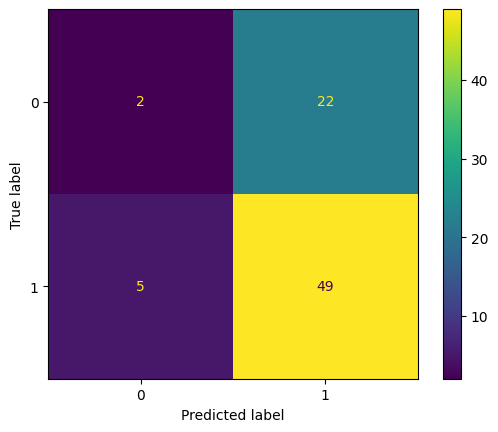

In [90]:
X_train_rabdo, X_test_rabdo, y_train_rabdo, y_test_rabdo = train_test_split(
    df[col_feature],
    df["Rabdomiólise"],
    train_size=0.80,
    random_state=28
)

results_rabdo = get_tests_result(X_train_rabdo, X_test_rabdo, y_train_rabdo, y_test_rabdo)
print("Resultados para previsão de Rabdomiólise:\n\n")
results_rabdo

Prevendo Lesão Renal Aguda

In [ ]:
X_train_lesao, X_test_lesao, y_train_lesao, y_test_lesao = train_test_split(
    df[col_feature],
    df["Lesão Renal Aguda"],
    train_size=0.80,
    random_state=28
)

results_lesao = get_tests_result(X_train_lesao, X_test_lesao, y_train_lesao, y_test_lesao)
print("Resultados para previsão de Lesão Renal Aguda:\n\n")
results_lesao

Salvando os resultados

In [ ]:
saving_results(results_rabdo, path + "ResultadosTestesPIBITI/Teste1/", "resultados_rabdomiolise.csv")

saving_results(results_lesao, path + "ResultadosTestesPIBITI/Teste1/", "resultados_lesao_renal_aguda.csv")

# Teste 2 - Pré CK MB e Pós CK MB

In [ ]:
col_label = ["Rabdomiólise"]
label_lesao = ["Lesão Renal Aguda"]
col_feature = ['Pré CK MB U/L', 'Pós CK MB U/L']
col_to_be_encoded = ["Rabdomiólise"]

col_df = ['Pré CK MB U/L', 'Pós CK MB U/L', "Rabdomiólise" ]

df = DATASET[col_df].dropna()
encoder = preprocessing.LabelEncoder()
for c in col_df:
    df = df.drop(df[df[c] == '-'].index)

for c in col_to_be_encoded:
    df[c] = encoder.fit_transform(df[c])

# convert to float
for d in col_feature:
    df[d] = df[d].astype(float)

df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( df[col_feature],
                                                    df[col_label],
                                                    train_size=0.80, random_state=28)

results = get_tests_result(X_train, X_test, y_train, y_test)
results

# Teste 3 - 'ACTN3',  'AGT', 'ECA', 'BDKRB2', 'Score Força%', 'Score Resistência %,

In [ ]:
col_label = ["Rabdomiólise"]
label_lesao = ["Lesão Renal Aguda"]
col_feature = ['ACTN3', 'AGT', 'ECA', 'BDKRB2', 'Score Força%', 'Score Resistência %']
col_to_be_encoded = ['ACTN3', 'AGT', 'ECA', 'BDKRB2', "Rabdomiólise"]
col_to_float = ['Score Força%', 'Score Resistência %']

col_df = ['ACTN3', 'AGT', 'ECA', 'BDKRB2', 'Score Força%', 'Score Resistência %', "Rabdomiólise" ]

df = DATASET[col_df].dropna()
encoder = preprocessing.LabelEncoder()
for c in col_df:
    df = df.drop(df[df[c] == '-'].index)

for c in col_to_be_encoded:
    df[c] = encoder.fit_transform(df[c])

# convert to float
for d in col_to_float:
    df[d] = df[d].astype(float)

df

In [41]:
X_train, X_test, y_train, y_test = train_test_split( df[col_feature],
                                                    df[col_label],
                                                    train_size=0.80, random_state=28)

results = get_tests_result(X_train, X_test, y_train, y_test)
results

MLPClassifier
Time: 0.8266878128051758
Acurácia: 0.48148148148148145
Precision: 0.46063710769593125
Recal: 0.48148148148148145
f1_score: 0.4654684095860566
[[ 6 17]
 [11 20]]
AdaBoostClassifier: 
Time: 0.17952251434326172
Acurácia: 0.5
Precision: 0.4563492063492064
Recal: 0.5
f1_score: 0.45909980430528374
[[ 4 19]
 [ 8 23]]
Voting_LR3_SVC1_ETC2: 
Time: 0.5888607501983643
Acurácia: 0.4444444444444444
Precision: 0.3711533944092084
Recal: 0.4444444444444444
f1_score: 0.39145027380321507
[[ 2 21]
 [ 9 22]]
DecisionTreeClassifier: 
Time: 0.015023469924926758
Acurácia: 0.4444444444444444
Precision: 0.4600766283524904
Recal: 0.4444444444444444
f1_score: 0.4467338217338217
[[11 12]
 [18 13]]
RandomForestClassifier: 
Time: 0.2109527587890625
Acurácia: 0.42592592592592593
Precision: 0.4053497942386831
Recal: 0.42592592592592593
f1_score: 0.4123420836198412
[[ 5 18]
 [13 18]]
ExtraTreesClassifier: 
Time: 0.3043227195739746
Acurácia: 0.4444444444444444
Precision: 0.4600766283524904
Recal: 0.444444

ALGORITHM      TIME  ACCURACY  PRECISION    RECALL  F1_SCORE
0           MLPClassifier:   0.826688  0.481481   0.460637  0.481481  0.465468
1      AdaBoostClassifier:   0.179523  0.500000   0.456349  0.500000  0.459100
2    Voting_LR3_SVC1_ETC2:   0.588861  0.444444   0.371153  0.444444  0.391450
3  DecisionTreeClassifier:   0.015023  0.444444   0.460077  0.444444  0.446734
4  RandomForestClassifier:   0.210953  0.425926   0.405350  0.425926  0.412342
5    ExtraTreesClassifier:   0.304323  0.444444   0.460077  0.444444  0.446734
6      LogisticRegression:   0.015626  0.500000   0.418478  0.500000  0.427734
7                     svm:   0.009803  0.574074   0.329561  0.574074  0.418736
8         Stacking_scikit:   2.688369  0.574074   0.329561  0.574074  0.418736
9                  OvR_RF:   0.167426  0.425926   0.405350  0.425926  0.412342

# Teste 4 - 'Idade', 'Peso Kg', 'Cor da pele',  'Score Força%', 'Score Resistência %'

In [42]:
col_label = ["Rabdomiólise"]
label_lesao = ["Lesão Renal Aguda"]
col_feature = ['Idade', 'Peso Kg', 'Cor da pele', 'Score Força%', 'Score Resistência %']
col_to_be_encoded = ["Cor da pele", "Rabdomiólise"]
col_to_float = ['Idade', 'Peso Kg', 'Score Força%', 'Score Resistência %']

col_df = ['Idade', 'Peso Kg', 'Cor da pele', 'Score Força%', 'Score Resistência %', "Rabdomiólise" ]

df = DATASET[col_df].dropna()
encoder = preprocessing.LabelEncoder()
for c in col_df:
    df = df.drop(df[df[c] == '-'].index)

for c in col_to_be_encoded:
    df[c] = encoder.fit_transform(df[c])

# convert to float
for d in col_to_float:
    df[d] = df[d].astype(float)

df

Idade  Peso Kg  Cor da pele  Score Força%  Score Resistência %  \
0     33.0     88.0            1          25.0                 75.0   
1     26.0     74.0            1          50.0                 50.0   
2     26.0     76.0            1          50.0                 50.0   
4     33.0     82.0            1          50.0                 50.0   
5     31.0     92.0            1         100.0                  0.0   
..     ...      ...          ...           ...                  ...   
338   28.0     87.0            1          62.5                 37.5   
339   27.0     78.5            1          50.0                 50.0   
340   25.0     85.1            1          37.5                 62.5   
342   28.0     85.0            1          50.0                 50.0   
343   28.0     81.0            1          62.5                 37.5   

     Rabdomiólise  
0               0  
1               1  
2               1  
4               1  
5               1  
..            ...  
338             1  
339             1  
340             0  
342             1  
343             1  

[268 rows x 6 columns]

In [43]:
X_train, X_test, y_train, y_test = train_test_split( df[col_feature],
                                                    df[col_label],
                                                    train_size=0.80, random_state=28)

results = get_tests_result(X_train, X_test, y_train, y_test)
results

MLPClassifier
Time: 0.4082355499267578
Acurácia: 0.5
Precision: 0.4678571428571429
Recal: 0.5
f1_score: 0.4708793300342596
[[ 5 18]
 [ 9 22]]
AdaBoostClassifier: 
Time: 0.21641850471496582
Acurácia: 0.5185185185185185
Precision: 0.48585921756653466
Recal: 0.5185185185185185
f1_score: 0.48508230452674894
[[ 5 18]
 [ 8 23]]
Voting_LR3_SVC1_ETC2: 
Time: 0.8055975437164307
Acurácia: 0.42592592592592593
Precision: 0.4053497942386831
Recal: 0.42592592592592593
f1_score: 0.4123420836198412
[[ 5 18]
 [13 18]]
DecisionTreeClassifier: 
Time: 0.006621837615966797
Acurácia: 0.35185185185185186
Precision: 0.3679503367003367
Recal: 0.35185185185185186
f1_score: 0.34985070834127435
[[10 13]
 [22  9]]
RandomForestClassifier: 
Time: 0.15014886856079102
Acurácia: 0.4074074074074074
Precision: 0.4134355044699873
Recal: 0.4074074074074074
f1_score: 0.40987654320987654
[[ 8 15]
 [17 14]]
ExtraTreesClassifier: 
Time: 0.2557046413421631
Acurácia: 0.4074074074074074
Precision: 0.4183813443072702
Recal: 0.4074

ALGORITHM      TIME  ACCURACY  PRECISION    RECALL  F1_SCORE
0           MLPClassifier:   0.408236  0.500000   0.467857  0.500000  0.470879
1      AdaBoostClassifier:   0.216419  0.518519   0.485859  0.518519  0.485082
2    Voting_LR3_SVC1_ETC2:   0.805598  0.425926   0.405350  0.425926  0.412342
3  DecisionTreeClassifier:   0.006622  0.351852   0.367950  0.351852  0.349851
4  RandomForestClassifier:   0.150149  0.407407   0.413436  0.407407  0.409877
5    ExtraTreesClassifier:   0.255705  0.407407   0.418381  0.407407  0.410677
6      LogisticRegression:   0.011160  0.555556   0.512327  0.555556  0.482621
7                     svm:   0.022769  0.574074   0.329561  0.574074  0.418736
8         Stacking_scikit:   3.156780  0.574074   0.329561  0.574074  0.418736
9                  OvR_RF:   0.177979  0.407407   0.413436  0.407407  0.409877

# Teste 5 - 'Pré Lactato (mmol/L)', 'Pós Lactato (mmol/L)'

In [44]:
col_label = ["Rabdomiólise"]
label_lesao = ["Lesão Renal Aguda"]
col_feature = ['Pré Lactato (mmol/L)', 'Pós Lactato (mmol/L)']
col_to_be_encoded = ["Rabdomiólise"]
col_to_float = ['Pré Lactato (mmol/L)', 'Pós Lactato (mmol/L)']

col_df = ['Pré Lactato (mmol/L)', 'Pós Lactato (mmol/L)', "Rabdomiólise" ]

df = DATASET[col_df].dropna()
encoder = preprocessing.LabelEncoder()
for c in col_df:
    df = df.drop(df[df[c] == '-'].index)

for c in col_to_be_encoded:
    df[c] = encoder.fit_transform(df[c])

# convert to float
for d in col_to_float:
    df[d] = df[d].astype(float)

df

Pré Lactato (mmol/L)  Pós Lactato (mmol/L)  Rabdomiólise
0                     0.0                   0.0             0
1                     0.0                   0.0             1
2                     0.0                   0.0             1
3                     0.0                   0.0             1
4                     0.0                   0.0             1
..                    ...                   ...           ...
423                   1.7                   2.2             1
424                   2.1                   2.2             1
425                   2.6                   1.8             1
426                   2.5                   1.9             1
427                   1.5                   1.8             1

[393 rows x 3 columns]

In [45]:
X_train, X_test, y_train, y_test = train_test_split( df[col_feature],
                                                    df[col_label],
                                                    train_size=0.80, random_state=28)

results = get_tests_result(X_train, X_test, y_train, y_test)
results

MLPClassifier
Time: 0.8137884140014648
Acurácia: 0.6708860759493671
Precision: 0.7044806108097248
Recal: 0.6708860759493671
f1_score: 0.6110598583994851
[[ 7 24]
 [ 2 46]]
AdaBoostClassifier: 
Time: 0.23244619369506836
Acurácia: 0.6455696202531646
Precision: 0.7761492338441038
Recal: 0.6455696202531646
f1_score: 0.5396440323781615
[[ 3 28]
 [ 0 48]]
Voting_LR3_SVC1_ETC2: 
Time: 0.8622791767120361
Acurácia: 0.6455696202531646
Precision: 0.6684749849306811
Recal: 0.6455696202531646
f1_score: 0.5690872751499001
[[ 5 26]
 [ 2 46]]
DecisionTreeClassifier: 
Time: 0.007257223129272461
Acurácia: 0.6075949367088608
Precision: 0.5846648682299233
Recal: 0.6075949367088608
f1_score: 0.5789415057626813
[[ 9 22]
 [ 9 39]]
RandomForestClassifier: 
Time: 0.15156006813049316
Acurácia: 0.620253164556962
Precision: 0.5985232067510549
Recal: 0.620253164556962
f1_score: 0.5813350106140419
[[ 8 23]
 [ 7 41]]
ExtraTreesClassifier: 
Time: 0.22174644470214844
Acurácia: 0.6075949367088608
Precision: 0.579454722

ALGORITHM      TIME  ACCURACY  PRECISION    RECALL  F1_SCORE
0           MLPClassifier:   0.813788  0.670886   0.704481  0.670886  0.611060
1      AdaBoostClassifier:   0.232446  0.645570   0.776149  0.645570  0.539644
2    Voting_LR3_SVC1_ETC2:   0.862279  0.645570   0.668475  0.645570  0.569087
3  DecisionTreeClassifier:   0.007257  0.607595   0.584665  0.607595  0.578942
4  RandomForestClassifier:   0.151560  0.620253   0.598523  0.620253  0.581335
5    ExtraTreesClassifier:   0.221746  0.607595   0.579455  0.607595  0.562991
6      LogisticRegression:   0.014632  0.607595   0.369172  0.607595  0.459284
7                     svm:   0.025552  0.645570   0.776149  0.645570  0.539644
8         Stacking_scikit:   1.779879  0.670886   0.786521  0.670886  0.587109
9                  OvR_RF:   0.118232  0.620253   0.598523  0.620253  0.581335

# Teste 6 - 'Pré LDH (U/L)',  'Pós LDH (U/L)', 'Pré AST (U/L)', 'Pós AST (U/L)',
       'Pré Albumina (g/dL)', 'Pós Albumina (g/dL)', 'Pré TGP (g/dL)',
       'Pós TGP (g/dL)', 'Pré GGT U/L', 'Pós GGT U/L', 'Pré Ac. Úrico (mg/dL)',
       'Pós Ac. Úrico (mg/dL)', 'Pré TFG   (ml/min/1.73 m2)',
       'Pós TFG   (ml/min/1.73 m2)', 'Pré Ureia mg/dL', 'Pós Ureia mg/dL',
       'Pré creatinina mg/dL', 'Pós creatinina mg/dL',
       'Delta CREATININA mg/dL', 'Pré Fósforo mg/dL', 'Pós Fósforo mg/dL',
       'Pré Proteína Total (g/dL)', 'Pós Proteína Total (g/dL)',
       'Pré FE (ug/dL)', 'Pós FE (ug/dL)', 'Pré calcio mg/dL',
       'Pós calcio mg/dL', 'Pré Potássio mmol/L', 'Pós Potássio mmol/L',
       'Glicose pré', 'Glicose pós', 'Pré Sódio mmol/L', 'Pós Sódio mmol/L',
       'Pré Magnésio mg/dL', 'Pós Magnésio mg/dL', 'Pré Cloro mmol/L',
       'Pós Cloro mmol/L'

In [46]:
col_label = ["Rabdomiólise"]
label_lesao = ["Lesão Renal Aguda"]
col_feature = ['Pré LDH (U/L)', 'Pós LDH (U/L)', 'Pré AST (U/L)', 'Pós AST (U/L)',
       'Pré Albumina (g/dL)', 'Pós Albumina (g/dL)', 'Pré TGP (g/dL)',
       'Pós TGP (g/dL)', 'Pré GGT U/L', 'Pós GGT U/L', 'Pré Ac. Úrico (mg/dL)',
       'Pós Ac. Úrico (mg/dL)', 'Pré TFG   (ml/min/1.73 m2)',
       'Pós TFG   (ml/min/1.73 m2)', 'Pré Ureia mg/dL', 'Pós Ureia mg/dL',
       'Pré creatinina mg/dL', 'Pós creatinina mg/dL',
       'Delta CREATININA mg/dL', 'Pré Fósforo mg/dL', 'Pós Fósforo mg/dL',
       'Pré Proteína Total (g/dL)', 'Pós Proteína Total (g/dL)',
       'Pré FE (ug/dL)', 'Pós FE (ug/dL)', 'Pré calcio mg/dL',
       'Pós calcio mg/dL', 'Pré Potássio mmol/L', 'Pós Potássio mmol/L',
       'Glicose pré', 'Glicose pós', 'Pré Sódio mmol/L', 'Pós Sódio mmol/L',
       'Pré Magnésio mg/dL', 'Pós Magnésio mg/dL', 'Pré Cloro mmol/L',
       'Pós Cloro mmol/L']
col_to_be_encoded = ["Rabdomiólise"]
col_to_float = ['Pré LDH (U/L)', 'Pós LDH (U/L)', 'Pré AST (U/L)', 'Pós AST (U/L)',
                'Pré Albumina (g/dL)',
                'Pós Albumina (g/dL)', 'Pré Ac. Úrico (mg/dL)',
       'Pós Ac. Úrico (mg/dL)', 'Pré TFG   (ml/min/1.73 m2)', 'Pós TFG   (ml/min/1.73 m2)',
                'Pré Ureia mg/dL', 'Pós Ureia mg/dL', 'Pré creatinina mg/dL', 'Pós creatinina mg/dL',
               'Delta CREATININA mg/dL', 'Pré Fósforo mg/dL', 'Pós Fósforo mg/dL',
                'Pré Proteína Total (g/dL)', 'Pós Proteína Total (g/dL)',
                'Pré FE (ug/dL)', 'Pós FE (ug/dL)', 'Pré calcio mg/dL',
       'Pós calcio mg/dL', 'Pré Potássio mmol/L', 'Pós Potássio mmol/L',
                'Pré Magnésio mg/dL', 'Pós Magnésio mg/dL', 'Pré Cloro mmol/L',
       'Pós Cloro mmol/L']

col_df = ['Pré LDH (U/L)', 'Pós LDH (U/L)', 'Pré AST (U/L)', 'Pós AST (U/L)',
       'Pré Albumina (g/dL)', 'Pós Albumina (g/dL)', 'Pré TGP (g/dL)',
       'Pós TGP (g/dL)', 'Pré GGT U/L', 'Pós GGT U/L', 'Pré Ac. Úrico (mg/dL)',
       'Pós Ac. Úrico (mg/dL)', 'Pré TFG   (ml/min/1.73 m2)',
       'Pós TFG   (ml/min/1.73 m2)', 'Pré Ureia mg/dL', 'Pós Ureia mg/dL',
       'Pré creatinina mg/dL', 'Pós creatinina mg/dL',
       'Delta CREATININA mg/dL', 'Pré Fósforo mg/dL', 'Pós Fósforo mg/dL',
       'Pré Proteína Total (g/dL)', 'Pós Proteína Total (g/dL)',
       'Pré FE (ug/dL)', 'Pós FE (ug/dL)', 'Pré calcio mg/dL',
       'Pós calcio mg/dL', 'Pré Potássio mmol/L', 'Pós Potássio mmol/L',
       'Glicose pré', 'Glicose pós', 'Pré Sódio mmol/L', 'Pós Sódio mmol/L',
       'Pré Magnésio mg/dL', 'Pós Magnésio mg/dL', 'Pré Cloro mmol/L',
       'Pós Cloro mmol/L', "Rabdomiólise" ]

df = DATASET[col_df].dropna()
encoder = preprocessing.LabelEncoder()
for c in col_df:
    df = df.drop(df[df[c] == '-'].index)

for c in col_to_be_encoded:
    df[c] = encoder.fit_transform(df[c])

# convert to float
for d in col_to_float:
    df[d] = df[d].astype(float)

df

Pré LDH (U/L)  Pós LDH (U/L)  Pré AST (U/L)  Pós AST (U/L)  \
0            629.0          796.0           33.0           48.0   
1            720.0         1182.0           49.0          105.0   
2            895.0         1531.0           57.0          145.0   
3            349.0          666.0           46.0          138.0   
4            643.0         1089.0           32.0           94.0   
..             ...            ...            ...            ...   
339          191.0          642.0           36.0          116.0   
340          190.0          751.0           29.0           59.0   
341          228.0          461.0           30.0           57.0   
342          246.0          545.0           31.0           82.0   
343          265.0          881.0           62.0          156.0   

     Pré Albumina (g/dL)  Pós Albumina (g/dL) Pré TGP (g/dL)  Pós TGP (g/dL)  \
0                    4.6                  4.0             37            63.0   
1                    4.9                  4.6             57            93.0   
2                    4.9                  4.8             58           113.0   
3                    4.8                  4.1             42           100.0   
4                    4.8                  4.3             32            85.0   
..                   ...                  ...            ...             ...   
339                  4.4                  4.7             38            42.0   
340                  4.4                  5.1             25            28.0   
341                  4.4                  5.1             29            43.0   
342                  4.5                  5.5             28            33.0   
343                  4.1                  5.2             44            51.0   

    Pré GGT U/L  Pós GGT U/L  ...  Pós Potássio mmol/L  Glicose pré  \
0            16         17.0  ...                  4.6          103   
1            38         37.0  ...                  4.3           95   
2            26         23.0  ...                  4.5           99   
3            13         10.0  ...                  4.6           94   
4            39         40.0  ...                  4.5           96   
..          ...          ...  ...                  ...          ...   
339          17         19.0  ...                  4.3           85   
340          19         22.0  ...                  4.7           91   
341          25         30.0  ...                  4.4           88   
342          17         18.0  ...                  5.0           93   
343          18         21.0  ...                  5.3          102   

     Glicose pós  Pré Sódio mmol/L  Pós Sódio mmol/L  Pré Magnésio mg/dL  \
0          110.0             145.0             146.0                 2.0   
1          114.0             142.0             141.0                 2.2   
2           98.0             145.0             146.0                 2.2   
3          144.0             144.0             143.0                 2.1   
4          142.0             142.0             142.0                 2.0   
..           ...               ...               ...                 ...   
339         91.0             139.0             137.0                 2.0   
340         94.0             139.0             138.0                 2.0   
341        101.0             140.0             138.0                 2.1   
342        107.0             138.0             139.0                 2.1   
343        102.0             139.0             140.0                 2.0   

     Pós Magnésio mg/dL  Pré Cloro mmol/L  Pós Cloro mmol/L  Rabdomiólise  
0                   2.0             103.0             106.0             0  
1                   1.9             102.0             103.0             1  
2                   2.2             105.0             100.0             1  
3                   2.0             106.0             108.0             1  
4                   1.9             102.0             103.0             1  
..               

In [47]:
X_train, X_test, y_train, y_test = train_test_split( df[col_feature],
                                                    df[col_label],
                                                    train_size=0.80, random_state=28)

results = get_tests_result(X_train, X_test, y_train, y_test)
results

MLPClassifier
Time: 0.05857968330383301
Acurácia: 0.4927536231884058
Precision: 0.495351380913317
Recal: 0.4927536231884058
f1_score: 0.4536555251785872
[[ 8 27]
 [ 8 26]]
AdaBoostClassifier: 
Time: 0.2477128505706787
Acurácia: 0.8405797101449275
Precision: 0.8556026864616473
Recal: 0.8405797101449275
f1_score: 0.8391626409017713
[[26  9]
 [ 2 32]]
Voting_LR3_SVC1_ETC2: 
Time: 0.4824709892272949
Acurácia: 0.7681159420289855
Precision: 0.7721512758052212
Recal: 0.7681159420289855
f1_score: 0.7675303762260284
[[25 10]
 [ 6 28]]
DecisionTreeClassifier: 
Time: 0.011063337326049805
Acurácia: 0.8115942028985508
Precision: 0.8186547751765143
Recal: 0.8115942028985508
f1_score: 0.8108000794123487
[[26  9]
 [ 4 30]]
RandomForestClassifier: 
Time: 0.10945510864257812
Acurácia: 0.8115942028985508
Precision: 0.8186547751765143
Recal: 0.8115942028985508
f1_score: 0.8108000794123487
[[26  9]
 [ 4 30]]
ExtraTreesClassifier: 
Time: 0.1544475555419922
Acurácia: 0.8405797101449275
Precision: 0.848197696

ALGORITHM      TIME  ACCURACY  PRECISION    RECALL  F1_SCORE
0           MLPClassifier:   0.058580  0.492754   0.495351  0.492754  0.453656
1      AdaBoostClassifier:   0.247713  0.840580   0.855603  0.840580  0.839163
2    Voting_LR3_SVC1_ETC2:   0.482471  0.768116   0.772151  0.768116  0.767530
3  DecisionTreeClassifier:   0.011063  0.811594   0.818655  0.811594  0.810800
4  RandomForestClassifier:   0.109455  0.811594   0.818655  0.811594  0.810800
5    ExtraTreesClassifier:   0.154448  0.840580   0.848198  0.840580  0.839908
6      LogisticRegression:   0.049311  0.782609   0.782938  0.782609  0.782609
7                     svm:   0.015028  0.826087   0.826087  0.826087  0.826087
8         Stacking_scikit:   2.005422  0.797101   0.806847  0.797101  0.795816
9                  OvR_RF:   0.127122  0.811594   0.818655  0.811594  0.810800

# Teste 7 - Série vermelha -  'Pré RCB 10^6/mm³', 'Pós RCB 10^6/mm³', 'Pré HGB g/dL', 'Pós HGB g/dL',
       'Pré HCT %', 'Pós HCT %', 'Pré MCV fL', 'Pós MCV fL', 'Pré MCH pg',
       'Pós MCH pg', 'Pré MCHC g/dL', 'Pós MCHC g/dL', 'Pré PLT 10³/mm³',
       'Pós PLT 10³/mm³', 'Pré RDW %', 'Pós RDW %', 'Pré RET %', 'Pós RET %'

In [48]:
col_label = ["Rabdomiólise"]
label_lesao = ["Lesão Renal Aguda"]
col_feature = ['Pré RCB 10^6/mm³', 'Pós RCB 10^6/mm³', 'Pré HGB g/dL', 'Pós HGB g/dL',
       'Pré HCT %', 'Pós HCT %', 'Pré MCV fL', 'Pós MCV fL', 'Pré MCH pg',
       'Pós MCH pg', 'Pré MCHC g/dL', 'Pós MCHC g/dL', 'Pré PLT 10³/mm³',
       'Pós PLT 10³/mm³', 'Pré RDW %', 'Pós RDW %', 'Pré RET %', 'Pós RET %']
col_to_be_encoded = ["Rabdomiólise"]
col_to_float = ['Pré RCB 10^6/mm³', 'Pós RCB 10^6/mm³', 'Pré HGB g/dL', 'Pós HGB g/dL',
       'Pré HCT %', 'Pós HCT %', 'Pré MCV fL', 'Pós MCV fL', 'Pré MCH pg',
       'Pós MCH pg', 'Pré MCHC g/dL', 'Pós MCHC g/dL', 'Pré PLT 10³/mm³',
       'Pós PLT 10³/mm³', 'Pré RDW %', 'Pós RDW %', 'Pré RET %', 'Pós RET %']

col_df = ['Pré RCB 10^6/mm³', 'Pós RCB 10^6/mm³', 'Pré HGB g/dL', 'Pós HGB g/dL',
       'Pré HCT %', 'Pós HCT %', 'Pré MCV fL', 'Pós MCV fL', 'Pré MCH pg',
       'Pós MCH pg', 'Pré MCHC g/dL', 'Pós MCHC g/dL', 'Pré PLT 10³/mm³',
       'Pós PLT 10³/mm³', 'Pré RDW %', 'Pós RDW %', 'Pré RET %', 'Pós RET %', "Rabdomiólise" ]

df = DATASET[col_df].dropna()
encoder = preprocessing.LabelEncoder()
for c in col_df:
    df = df.drop(df[df[c] == '-'].index)

for c in col_to_be_encoded:
    df[c] = encoder.fit_transform(df[c])

# convert to float
for d in col_to_float:
    df[d] = df[d].astype(float)

df

Pré RCB 10^6/mm³  Pós RCB 10^6/mm³  Pré HGB g/dL  Pós HGB g/dL  \
0                4.38              4.37          13.5          13.3   
1                0.00              4.64           0.0          13.9   
2                0.00              4.77           0.0          14.5   
3                5.22              4.52          14.9          13.1   
4                4.37              4.06          13.3          12.5   
..                ...               ...           ...           ...   
339              4.58              4.48          14.4          16.2   
340              4.49              5.61          13.7          11.8   
341              4.61              4.70          14.0          12.5   
342              4.64              3.24          13.8          12.3   
343              4.81              5.41          14.4          13.2   

     Pré HCT %  Pós HCT %  Pré MCV fL  Pós MCV fL  Pré MCH pg  Pós MCH pg  \
0         40.9       39.4        93.4        90.2        30.8        30.4   
1          0.0       40.6         0.0        87.5         0.0        30.0   
2          0.0       42.7         0.0        89.5         0.0        30.4   
3         47.7       38.7        91.4        85.6        28.5        29.0   
4         41.9       37.5        95.9        92.4        30.4        30.8   
..         ...        ...         ...         ...         ...         ...   
339       44.2       48.4        96.4        95.4        31.4        32.0   
340       42.2       36.5        93.8        93.7        30.4        30.3   
341       42.7       37.9        92.5        92.0        30.3        30.3   
342       41.7       37.3        89.8        89.6        29.8        29.5   
343       44.5       41.2        92.5        92.8        29.9        29.7   

     Pré MCHC g/dL  Pós MCHC g/dL  Pré PLT 10³/mm³  Pós PLT 10³/mm³  \
0             33.0           33.8            299.0            289.0   
1              0.0           34.2            268.0            304.0   
2              0.0           34.0              0.0            268.0   
3             31.2           33.9            242.0            246.0   
4             31.7           33.3            192.0            259.0   
..             ...            ...              ...              ...   
339            0.0            0.0              0.0              0.0   
340            0.0            0.0              0.0              0.0   
341            0.0            0.0              0.0              0.0   
342            0.0            0.0              0.0              0.0   
343            0.0            0.0              0.0              0.0   

     Pré RDW %  Pós RDW %  Pré RET %  Pós RET %  Rabdomiólise  
0         12.8       12.2       1.83       1.52             0  
1          0.0       13.4       0.00       1.47             1  
2          0.0       12.1       0.00       1.20             1  
3         12.9       12.4       0.00       1.11             1  
4         11.7       12.1       0.00       2.27             1  
..         ...        ...        ...        ...           ...  
339        0.0        0.0       0.00       1.56             1  
340        0.0        0.0       0.00       1.10             0  
341        0.0        0.0       0.00       0.96             0  
342        0.0        0.0       0.00       0.57             1  
343        0.0        0.0       0.00       1.67             1  

[344 rows x 19 columns]

In [49]:
X_train, X_test, y_train, y_test = train_test_split( df[col_feature],
                                                    df[col_label],
                                                    train_size=0.80, random_state=28)

results = get_tests_result(X_train, X_test, y_train, y_test)
results

MLPClassifier
Time: 0.3102390766143799
Acurácia: 0.5217391304347826
Precision: 0.5242474916387959
Recal: 0.5217391304347826
f1_score: 0.48875562218890556
[[ 9 25]
 [ 8 27]]
AdaBoostClassifier: 
Time: 0.16003966331481934
Acurácia: 0.6811594202898551
Precision: 0.6964573268921095
Recal: 0.6811594202898551
f1_score: 0.673600699650175
[[18 16]
 [ 6 29]]
Voting_LR3_SVC1_ETC2: 
Time: 0.49437999725341797
Acurácia: 0.6666666666666666
Precision: 0.7035087719298245
Recal: 0.6666666666666666
f1_score: 0.6489086200517943
[[15 19]
 [ 4 31]]
DecisionTreeClassifier: 
Time: 0.009392499923706055
Acurácia: 0.5942028985507246
Precision: 0.5941784175479827
Recal: 0.5942028985507246
f1_score: 0.5936905284731372
[[19 15]
 [13 22]]
RandomForestClassifier: 
Time: 0.11125040054321289
Acurácia: 0.6956521739130435
Precision: 0.6992128935532234
Recal: 0.6956521739130435
f1_score: 0.6937198067632849
[[21 13]
 [ 8 27]]
ExtraTreesClassifier: 
Time: 0.15282654762268066
Acurácia: 0.6811594202898551
Precision: 0.704538

ALGORITHM      TIME  ACCURACY  PRECISION    RECALL  F1_SCORE
0           MLPClassifier:   0.310239  0.521739   0.524247  0.521739  0.488756
1      AdaBoostClassifier:   0.160040  0.681159   0.696457  0.681159  0.673601
2    Voting_LR3_SVC1_ETC2:   0.494380  0.666667   0.703509  0.666667  0.648909
3  DecisionTreeClassifier:   0.009392  0.594203   0.594178  0.594203  0.593691
4  RandomForestClassifier:   0.111250  0.695652   0.699213  0.695652  0.693720
5    ExtraTreesClassifier:   0.152827  0.681159   0.704538  0.681159  0.670328
6      LogisticRegression:   0.032839  0.579710   0.595271  0.579710  0.557320
7                     svm:   0.013726  0.695652   0.756689  0.695652  0.674663
8         Stacking_scikit:   1.892267  0.710145   0.766221  0.710145  0.692515
9                  OvR_RF:   0.136240  0.695652   0.699213  0.695652  0.693720

# Teste 8 - Série leucocitária - 'Pré WBC 10³/mm³', 'Pós WBC 10³/mm³', 'Pré NEUT %', 'Pós NEUT %',
       'Pré LINF %', 'Pós LINF %', 'Pré MONO %', 'Pós MONO %', 'Pré EOS %',
       'Pós EOS %', 'Pré BASO %', 'Pós BASO %'

In [50]:
col_label = ["Rabdomiólise"]
label_lesao = ["Lesão Renal Aguda"]
col_feature = ['Pré WBC 10³/mm³', 'Pós WBC 10³/mm³', 'Pré NEUT %', 'Pós NEUT %',
       'Pré LINF %', 'Pós LINF %', 'Pré MONO %', 'Pós MONO %', 'Pré EOS %',
       'Pós EOS %', 'Pré BASO %', 'Pós BASO %']
col_to_be_encoded = ["Rabdomiólise"]
col_to_float = ['Pré WBC 10³/mm³', 'Pós WBC 10³/mm³', 'Pré NEUT %', 'Pós NEUT %',
       'Pré LINF %', 'Pós LINF %', 'Pré MONO %', 'Pós MONO %', 'Pré EOS %',
       'Pós EOS %', 'Pré BASO %', 'Pós BASO %']

col_df = ['Pré WBC 10³/mm³', 'Pós WBC 10³/mm³', 'Pré NEUT %', 'Pós NEUT %',
       'Pré LINF %', 'Pós LINF %', 'Pré MONO %', 'Pós MONO %', 'Pré EOS %',
       'Pós EOS %', 'Pré BASO %', 'Pós BASO %', "Rabdomiólise" ]

df = DATASET[col_df].dropna()
encoder = preprocessing.LabelEncoder()
for c in col_df:
    df = df.drop(df[df[c] == '-'].index)

for c in col_to_be_encoded:
    df[c] = encoder.fit_transform(df[c])

# convert to float
for d in col_to_float:
    df[d] = df[d].astype(float)

df

Pré WBC 10³/mm³  Pós WBC 10³/mm³  Pré NEUT %  Pós NEUT %  Pré LINF %  \
0               7.38             8.17        49.1        72.6        39.0   
1               0.00             9.38         0.0        72.0         0.0   
2               0.00             7.48         0.0        82.8         0.0   
3               4.91             5.79        52.0        67.8        34.6   
4               6.31            10.56        79.1        82.6        15.2   
..               ...              ...         ...         ...         ...   
442             6.63             8.28        59.1        55.6        30.3   
443             8.61             8.28        59.5        70.7        31.5   
444             5.45            15.77        44.6        52.3        41.8   
445             4.90            11.69        57.4        57.5        31.0   
446             7.57             9.16        19.1        42.4        69.6   

     Pós LINF %  Pré MONO %  Pós MONO %  Pré EOS %  Pós EOS %  Pré BASO %  \
0          21.1         8.3         5.3        3.3        0.9         0.3   
1          12.5         0.0        15.0        0.0        0.3         0.0   
2          11.2         0.0         5.6        0.0        0.1         0.0   
3          21.6        11.2         6.2        1.2        3.5         1.0   
4          10.9         4.1         5.5        1.1        0.9         0.5   
..          ...         ...         ...        ...        ...         ...   
442        34.1         8.0         8.5        1.4        1.0         1.2   
443        20.6         6.7         8.3        2.0        0.1         0.3   
444        36.3         9.0        10.4        3.9        0.6         0.7   
445        31.4         8.8         9.9        2.0        0.7         0.8   
446        48.8         8.7         7.8        1.7        0.5         0.9   

     Pós BASO %  Rabdomiólise  
0           0.1             0  
1           0.2             1  
2           0.3             1  
3           0.9             1  
4           0.1             1  
..          ...           ...  
442         0.8             0  
443         0.3             0  
444         0.4             0  
445         0.5             0  
446         0.5             0  

[411 rows x 13 columns]

In [51]:
X_train, X_test, y_train, y_test = train_test_split( df[col_feature],
                                                    df[col_label],
                                                    train_size=0.80, random_state=28)

results = get_tests_result(X_train, X_test, y_train, y_test)
results

MLPClassifier
Time: 0.31189870834350586
Acurácia: 0.6867469879518072
Precision: 0.6858925061949928
Recal: 0.6867469879518072
f1_score: 0.6859187631843472
[[24 14]
 [12 33]]
AdaBoostClassifier: 
Time: 0.1742537021636963
Acurácia: 0.6867469879518072
Precision: 0.6859080981790306
Recal: 0.6867469879518072
f1_score: 0.684710473098066
[[23 15]
 [11 34]]
Voting_LR3_SVC1_ETC2: 
Time: 0.5011818408966064
Acurácia: 0.6867469879518072
Precision: 0.7017561772513784
Recal: 0.6867469879518072
f1_score: 0.6724640497473766
[[18 20]
 [ 6 39]]
DecisionTreeClassifier: 
Time: 0.0077741146087646484
Acurácia: 0.6626506024096386
Precision: 0.6618975903614458
Recal: 0.6626506024096386
f1_score: 0.6587349397590361
[[21 17]
 [11 34]]
RandomForestClassifier: 
Time: 0.19763970375061035
Acurácia: 0.6867469879518072
Precision: 0.6859080981790306
Recal: 0.6867469879518072
f1_score: 0.684710473098066
[[23 15]
 [11 34]]
ExtraTreesClassifier: 
Time: 0.25535035133361816
Acurácia: 0.7228915662650602
Precision: 0.72332968

ALGORITHM      TIME  ACCURACY  PRECISION    RECALL  F1_SCORE
0           MLPClassifier:   0.311899  0.686747   0.685893  0.686747  0.685919
1      AdaBoostClassifier:   0.174254  0.686747   0.685908  0.686747  0.684710
2    Voting_LR3_SVC1_ETC2:   0.501182  0.686747   0.701756  0.686747  0.672464
3  DecisionTreeClassifier:   0.007774  0.662651   0.661898  0.662651  0.658735
4  RandomForestClassifier:   0.197640  0.686747   0.685908  0.686747  0.684710
5    ExtraTreesClassifier:   0.255350  0.722892   0.723330  0.722892  0.720427
6      LogisticRegression:   0.264210  0.710843   0.710438  0.710843  0.708964
7                     svm:   0.021604  0.590361   0.632415  0.590361  0.519485
8         Stacking_scikit:   3.886893  0.722892   0.733673  0.722892  0.714534
9                  OvR_RF:   0.140387  0.686747   0.685908  0.686747  0.684710